In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [107]:
X_train = np.load(os.path.join('assets', 'X_train_surge_new.npz'))
Y_train = pd.read_csv(os.path.join('assets', 'Y_train_surge.csv'))
X_test = np.load(os.path.join('assets', 'X_test_surge_new.npz'))

In [108]:
x_surge1 = X_train['surge1_input']  # (5599, 10)
x_surge2 = X_train['surge2_input']  # (5599, 10)
xt_surge1 = X_train['t_surge1_input']  # (5599, 10)

x_slp = X_train['slp']       # (5599, 40, 41, 41)
x_slp = x_slp[:, ::4, :, :]  # (5599, 10, 41, 41)
print(x_slp.shape)

y_surge1 = np.array([Y_train[f'surge1_t{i}'] for i in range(10)]).T  # (5599, 10)
y_surge2 = np.array([Y_train[f'surge2_t{i}'] for i in range(10)]).T  # (5599, 10)

print(x_surge1.shape, y_surge1.shape)

(5599, 10, 41, 41)
(5599, 10) (5599, 10)


In [109]:
images = x_slp
print(len(images))
data_im = np.array([ [[0.0]*2 for i in range(10) ] for j in range(5599)]) #change to 5599 

for i in range(5599):  #change to 5599 for better computer
    for j in range(10):

        data_im[i][j][0] = np.mean(images[i,j,:,:])
        data_im[i][j][1]= np.std(images[i,j,:,:])


print(data_im[0][0])
print(data_im.shape)

5599
[101891.2734375    1042.65576172]
(5599, 10, 2)


(1000,)
(1000, 2)
(1000,)
(1000, 2)
0.011444150606569004
[100475.5234375    1338.65527344]
[100168.015625     1531.77587891]
[100523.1171875    1382.01062012]
[101046.828125     1259.59313965]
[101254.453125     1384.54675293]
[101412.4609375    1685.23620605]
[101586.0390625    1224.79345703]
[101507.890625     1286.99450684]
[101691.0859375    1418.81896973]
[101635.296875     1504.97766113]
[102063.53125       741.41339111]
[100845.703125     1527.80322266]
[100963.078125     1887.02685547]
[101053.8671875    1929.13623047]
[101137.96875     1735.1619873]
[100573.1640625   1912.1003418]
[100801.84375      1731.96154785]
[100691.875        1473.04870605]
[100836.625        1292.21850586]
[100968.640625     1343.62963867]
[100607.96875      1777.98400879]
[100857.5390625    1611.04418945]
[102219.6484375     724.71563721]
[102020.7421875     688.26239014]
[101931.6875       716.8571167]
[101868.3359375     755.13153076]
[101803.875         833.15118408]
[101854.1796875     787.2011108

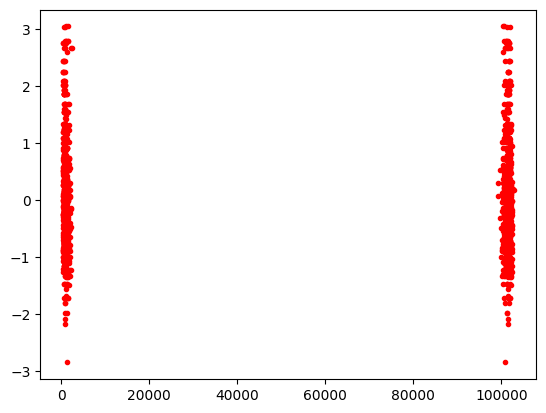

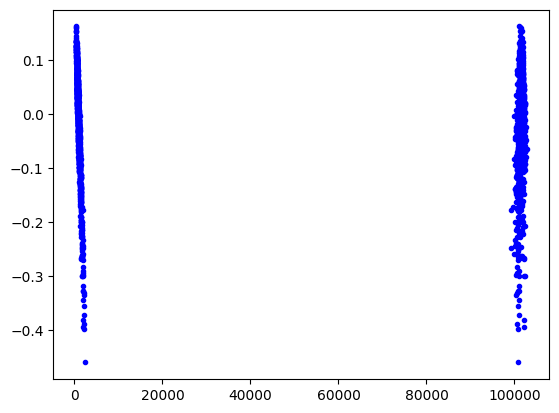

ValueError: x and y must have same first dimension, but have shapes (2,) and (1000,)

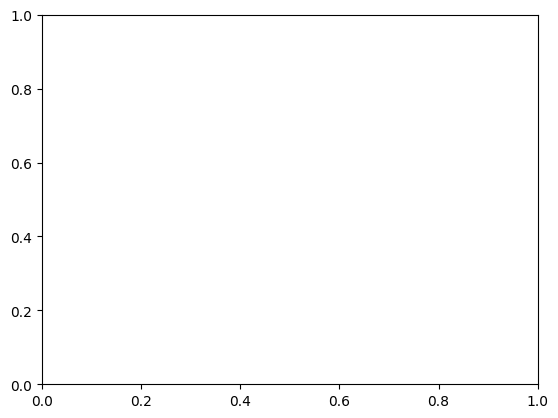

In [124]:
#créer un objet reg Lin
modele=LinearRegression()

#créer y et X
y=x_surge1[:100].reshape(-1,)
print(y.shape)
X=data_im


liste=np.empty([1000,2])

print(liste.shape)
for k in range(1000):
    for i in range(10):
        liste[k]=data_im[k][i]
X=liste
print(y.shape)
print(X.shape)
modele.fit(X,y)
print(modele.score(X,y))
predictions=modele.predict(X)

for k in range(100):
    print(X[k])



#print(preditions)
#print(y)

plt.plot(X,y,'.',c='r')
plt.show()
plt.plot(X,predictions, '.', c='b')
plt.show()
plt.plot(X[1],y,'.',c='r')
plt.show()
plt.plot(X[1],predictions, '.', c='b')
plt.show()

(10, 1681)
(10, 1681)
(10,)
1.0


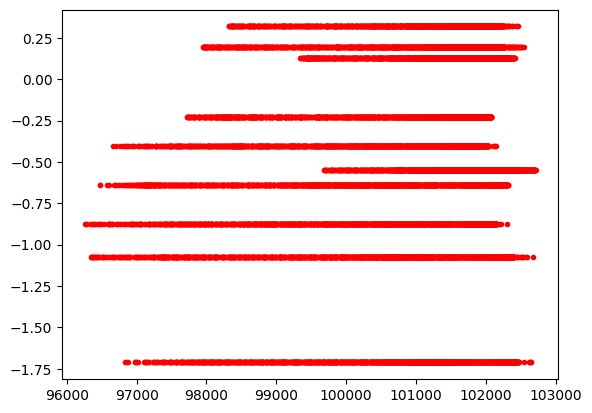

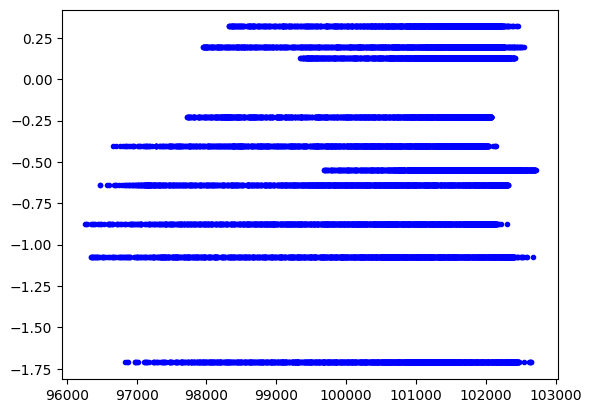

In [125]:
#créer un objet reg Lin
modele=LinearRegression()

#créer y et X
list_var=X_train.files
y=x_surge1[0]
liste=np.zeros([10,41*41])

print(liste.shape)
for k in range(10):
    liste[k]=x_slp[2][k].reshape(-1,)

X=liste
print(X.shape)
print(y.shape)

modele.fit(X,y)
print(modele.score(X,y))
predictions=modele.predict(X)

#print(preditions)
#print(y)

plt.plot(X,y,'.',c='r')
plt.show()
plt.plot(X,predictions, '.', c='b')
plt.show()

95078.0234375
(100, 1681)
(100, 1)
1.0
[[-0.54593754]
 [ 0.13110517]
 [ 0.31880018]
 [ 0.19478741]
 [-0.22752637]
 [-0.40181461]
 [-0.87440383]
 [-0.63978505]
 [-1.07550561]
 [-1.71232796]
 [ 0.31880018]
 [ 0.19478741]
 [-0.22752637]
 [-0.40181461]
 [-0.87440383]
 [-0.63978505]
 [-1.07550561]
 [-1.71232796]
 [ 0.58693594]
 [ 1.0695802 ]
 [-0.22752637]
 [-0.40181461]
 [-0.87440383]
 [-0.63978505]
 [-1.07550561]
 [-1.71232796]
 [ 0.58693594]
 [ 1.0695802 ]
 [ 0.76792753]
 [-0.1001619 ]
 [-0.87440383]
 [-0.63978505]
 [-1.07550561]
 [-1.71232796]
 [ 0.58693594]
 [ 1.0695802 ]
 [ 0.76792753]
 [-0.1001619 ]
 [ 0.07077463]
 [-0.24428485]
 [-1.07550561]
 [-1.71232796]
 [ 0.58693594]
 [ 1.0695802 ]
 [ 0.76792753]
 [-0.1001619 ]
 [ 0.07077463]
 [-0.24428485]
 [-0.35489085]
 [-0.92803097]
 [ 0.58693594]
 [ 1.0695802 ]
 [ 0.76792753]
 [-0.1001619 ]
 [ 0.07077463]
 [-0.24428485]
 [-0.35489085]
 [-0.92803097]
 [-0.77385294]
 [-0.37500101]
 [ 0.76792753]
 [-0.1001619 ]
 [ 0.07077463]
 [-0.24428485]
 

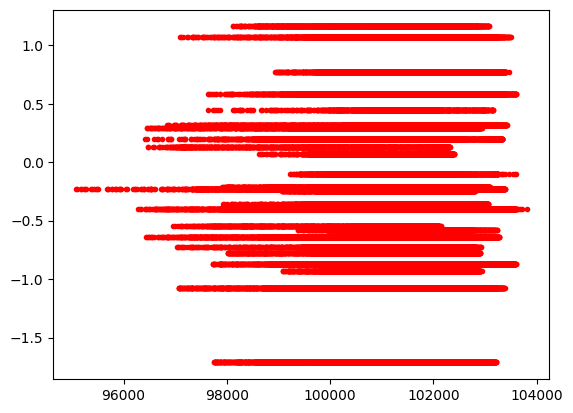

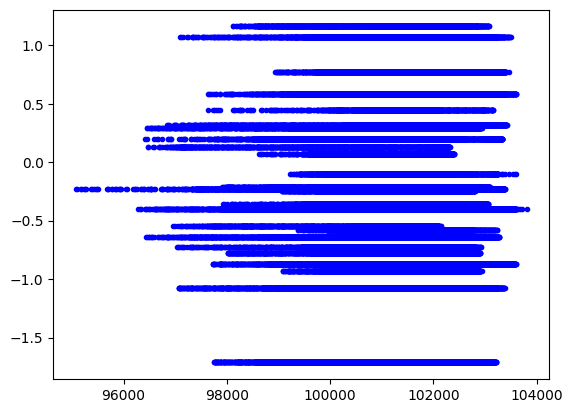

In [146]:

#créer un objet reg Lin
modele=LinearRegression()
nb_jour=30
#créer y et X
list_var=X_train.files

y=x_surge1[:10].reshape(-1,1)

liste=np.zeros([100,41*41])

#print(liste.shape)
m=100000.0
for i in range(100): #Change
    for k in range(10):
        liste[i]=x_slp[i][k].reshape(-1,)
print(liste.min())
X=liste
print(X.shape)
print(y.shape)

modele.fit(X,y)
print(modele.score(X,y))
predictions=modele.predict(X)

print(predictions)
print(y)
print(X.min())
plt.plot(X,y,'.',c='r')
plt.show()

X=y_surge1
plt.plot(X,predictions, '.',c='b')
plt.show()

X=x_surge1[:10].reshape(-1,1)

In [ ]:
# create input data (each input is a tuple of (surge1, surge2, slp))
x_slp_flat = x_slp.reshape(x_slp.shape[0], -1)
print(x_surge1.shape, x_surge2.shape, x_slp_flat.shape)

input_data = np.concatenate([x_surge1, x_surge2, x_slp_flat], axis=1)
print(input_data.shape)

output_data = np.concatenate([y_surge1, y_surge2], axis=1)

# create time series data
def create_time_series_data(data, time_steps=10):
  X, Y = [], []
  for i in range(len(data) - time_steps):
    X.append(data[i: i + time_steps])
    Y.append(data[i + time_steps])
  return np.array(X), np.array(Y)

# create time series data
X, Y = create_time_series_data(input_data, time_steps=10)
print(X.shape, Y.shape)

# create train and test data
X_train, X_test = X[:5000], X[5000:]
Y_train, Y_test = Y[:5000], Y[5000:]

del X, Y, input_data, output_data, x_surge1, x_surge2, x_slp_flat, x_slp, y_surge1, y_surge2


In [ ]:
# create model
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(128, input_shape=(10, 16830), return_sequences=True),
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.Dense(20)
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()


In [ ]:
# fit model
hitsory = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

# plot loss
plt.plot(hitsory.history['loss'], label='train')
plt.plot(hitsory.history['val_loss'], label='test')
plt.legend()
plt.show()


In [ ]:
# make predictions
Y_pred = model.predict(X_test)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
 
# plot predictions
plt.plot(Y_test[:, 0], label='actual')
plt.plot(Y_pred[:, 0], label='predicted')
plt.legend()
plt.show()

In [ ]:
import surge_prediction_metric as surge

# convert predictions to dataframe
Y_pred_df = pd.DataFrame(Y_pred, columns=[f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)])
Y_true_df = pd.DataFrame(Y_test, columns=[f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)])

s1 = surge.surge_prediction_metric(Y_true_df[:10], Y_pred_df[:10])
s2 = surge.surge_prediction_metric(Y_true_df[10:], Y_pred_df[10:])
print(s1, s2)